In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

import networkx as nx
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
from bokeh.palettes import Spectral4

G=nx.read_gpickle("../data/processed/got_graph.gpickle")



# Graph Analytics

By: Brittney Benzio & Sabrina Collins

## Agenda

### <span style="color:#0000CD"> Introduction </span> 
* What is a graph?


### <span style="color:#0000CD"> Data Problem  </span> 
* What is the graph we are using and what is the problem we are trying to solve?


### <span style="color:#0000CD"> Graph Visualization  </span> 
* What can we learn through visualizing a graph?


### <span style="color:#0000CD"> Analysis  </span>  
* How can we quantify relationships?


## <span style="color:#0000CD"> What is a Graph?  </span>  

### Definition 

A graph G(V,E) consists of a set of vertices V(G), edges E(G), and a relation (i.e. direction) that connects each edge with two vertices.

### History of Graph Theory


<img src="https://www.maa.org/sites/default/files/images/cms_upload/Konigsberg_colour37936.jpg" alt="Drawing" style="width: 650px;"/>


* Introduced in the early 1700s by Swiss mathematician **Leonhard Euler** with the [Seven Bridges of Konigsberg Bridge Problem](https://www.math.utah.edu/mathcircle/notes/MC_Graph_Theory.pdf)


* **Seven bridges** divided the city into **four separate landmasses**


* Expressed the landmasses as *vertices* and the bridges as *edges* to determine if a route through the city only crossing each bridge once existed

<img src="https://mvngu.files.wordpress.com/2011/03/konigsberg.png" alt="Drawing" style="width: 350px;"/>


Photo Cred: 

MacTutor History of Mathematics Archive. Retrieved from http://www-history.mcs.st-andrews.ac.uk/Extras/Konigsberg.html. 

Maths and Technology. "Euler's solution for the bridges of Konigsberg problem" (2013). Retrieved from http://www-history.mcs.st-andrews.ac.uk/Extras/Konigsberg.html. 

## Types of Graphs

* [Undirected](https://en.wiktionary.org/wiki/undirected_graph): edges have no direction, meaning each edge connects an unordered pair of nodes  
<br>
* [Directed](http://mathinsight.org/definition/directed_graph): communication from one node to another is one-way like having a *starting point* and an *end point*, also known as a digraph  
<br>
* [Multigraph](https://en.wikipedia.org/wiki/Multigraph): a graph that can have *multiple (parallel) edges* between the same two nodes  
<br>
* [Simple](http://mathworld.wolfram.com/SimpleGraph.html): an unweighted, undirected graph containing no loops or multiple edges  
<br>
* [Bipartite](http://mathworld.wolfram.com/BipartiteGraph.html): a set of vertices that can be decomposed into two 
*disjoint sets* such that no two vertices within the same set are adjacent, also called a bigraph  
<br>
* [Time-varying](https://en.wikipedia.org/wiki/Time-varying_network): for each node and edge, links are only active for certain *points in time*

## Example: Delta Flight Path Map


<img src="https://upload.wikimedia.org/wikipedia/commons/5/5f/Delta_1970_Flight_Hub.jpeg" alt="Drawing" style="width: 650px;"/>

###  <span style="color:green">  Knowledge Check: </span>

***For the Delta System Route Map, what are the nodes? What are the edges?***

# <span style="color:blue">  Data Problem </span>

Can you relate to either of the following scenarios?

Scenario 1:

***It's Monday morning and you see your co-workers huddled together furiously discussing something seemingly important. Upon approaching the group, you start to hear names of people and words that definitely do not relate to anything your team does daily. Who is Stark? Did they say dragons? What does hodor mean!? And, what the heck is a whitewalker!? Holy moly they are talking about Game of Thrones again and I could care less.***

Scenario 2:

***It's Sunday night at 9pm. You're ready for the newest episode of GOT. But wait, the recap is testing your memory all the way back to season one!! I don't even remember half of those charcters. Who are they again and why in the world are they important!? Aren't they dead?? This is going to be a tough episode to follow.***

Fear not, fuzzy brains! Because we are going to play...

<br>
<br>

## Game of Nodes!!!

<img src="https://orig00.deviantart.net/f351/f/2014/094/b/3/play_the_game_by_betteo-d7d0925.jpg" width="500">

Image Credit: [Patricio Betteo](http://betteo.blogspot.com)

### Our Goal:
Game of Thrones characters come from a five novel series which really racks up the number of players you have to remember. Therefore, the goal of this course is to uncover who the key players are in this saga using **graph analytics**. 

### Takeaway:
Even if you couldn't care less about Game of Thrones or you are a super fan, through this workshop we will demonstrate how graph analytics is a powerful technique for quickly drawing conclusions from large amounts of complex, relational data.

## Source Data

We found two public sources for datasets that will work for GoT graph analysis (both based on the books). 

1. [Character Interactions:](https://github.com/mathbeveridge/asoiaf/tree/master/data) [Andrew Beveridge](https://twitter.com/mathbeveridge) created a dataset based on the five books of the GOT saga "A Song of Ice and Fire" by George R.R. Martin. He created a character edge and node dataset based on analyzing interactions of characters within each of the five books. An interaction between two characters was defined by whenever their names (or nicknames) appeared within 15 words of one another.  
<br>
2. [Character Deaths:](https://www.kaggle.com/mylesoneill/game-of-thrones/data) Myles O'Neill has three GoT datasets and we are using the character-deaths.csv because it provides characters information for 71% of the characters we have in the interaction data. 

Check out `../notebooks/data-overview.ipynb` for an overview on the datasets contents. And reference `../notebooks/data-prep.ipynb` for how we cleaned and prepped our source data. 

###  <span style="color:green">  Knowledge Check: </span>

***Which of the two datasets contains information only about the nodes?***

## Game of Thrones Character Interactions Graph 

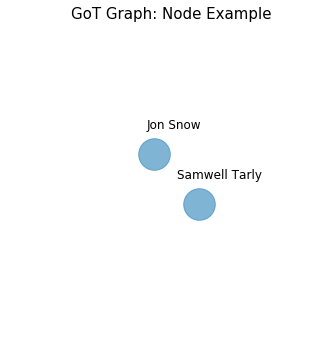

In [4]:
#Node layout and Lable Layout
spring_layout=nx.spring_layout(G)
pos_higher = {}
y_off = 0.015  # offset on the y axis
x_off = 0.01 # offset on the x axis
for k, v in spring_layout.items():
    pos_higher[k] = (v[0]+x_off, v[1]+y_off)
    
char_nodes = ['jon-snow', 'samwell-tarly']
char_edges = [('jon-snow', 'samwell-tarly')]

#Node Example
labels={ key:value for key,value in nx.get_node_attributes(G, name='Label').items() if key in char_nodes}   

plt.figure(figsize=(5,5), frameon=False)
plt.suptitle('GoT Graph: Node Example', fontsize=15)
nx.draw_networkx_nodes(G, nodelist=char_nodes, pos=spring_layout, 
                           node_size=1000, alpha=0.6, node_color=Spectral4[0])
nx.draw_networkx_labels(G, nodelist=char_nodes, pos=pos_higher, labels=labels, font_color='black')

plt.autoscale(enable=True, axis='both', tight=True)
plt.axis('off')                       
plt.show()

In [5]:
print("Node Attributes:")
print(" ")

# Print sample node info (top two interactive characters)
for i in char_nodes:
    print(str.upper(i) +":" )
    print(' ')
    print(G.node[i])
    print(' ')


Node Attributes:
 
JON-SNOW:
 
{'Label': 'Jon Snow', 'Allegiances': "Night's Watch", 'Gender': 1.0, 'Nobility': 1.0, 'GoT': 1.0, 'CoK': 1.0, 'SoS': 1.0, 'FfC': 1.0, 'DwD': 1.0, 'Dead': 0.0}
 
SAMWELL-TARLY:
 
{'Label': 'Samwell Tarly', 'Allegiances': "Night's Watch", 'Gender': 1.0, 'Nobility': 1.0, 'GoT': 1.0, 'CoK': 1.0, 'SoS': 1.0, 'FfC': 1.0, 'DwD': 1.0, 'Dead': 0.0}
 


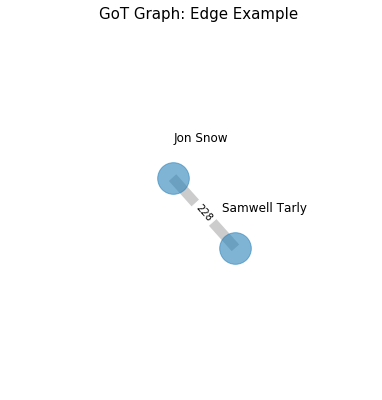

In [6]:
#Edge Example
plt.figure(figsize=(6,6), frameon=False)
plt.suptitle('GoT Graph: Edge Example', fontsize=15)
#labels filter
edge_labels={ key:value for key,value in nx.get_edge_attributes(G, name='weight').items() if key in char_edges }            

nx.draw_networkx_nodes(G, nodelist=char_nodes, pos=spring_layout, 
                           node_size=1000, alpha=0.6, node_color=Spectral4[0])
nx.draw_networkx_labels(G, nodelist=char_nodes, pos=pos_higher, labels=labels, font_color='black')

nx.draw_networkx_edges(G, edgelist=char_edges, pos=spring_layout, alpha=1.0, width=10, edge_color="#CCCCCC")
nx.draw_networkx_edge_labels(G, edgelist=char_edges, pos=spring_layout,edge_labels=edge_labels )                   

plt.autoscale(enable=True, axis='both', tight=True)
plt.axis('off')                       
plt.show()

In [7]:
print("Edge Attributes:")
print(" ")
print("(jon-snow, samwell-tarly)")
G.edge[char_nodes[0]][char_nodes[1]]


Edge Attributes:
 
(jon-snow, samwell-tarly)


{'weight': 228, 'weight_inv': 0.0043859649122807015}

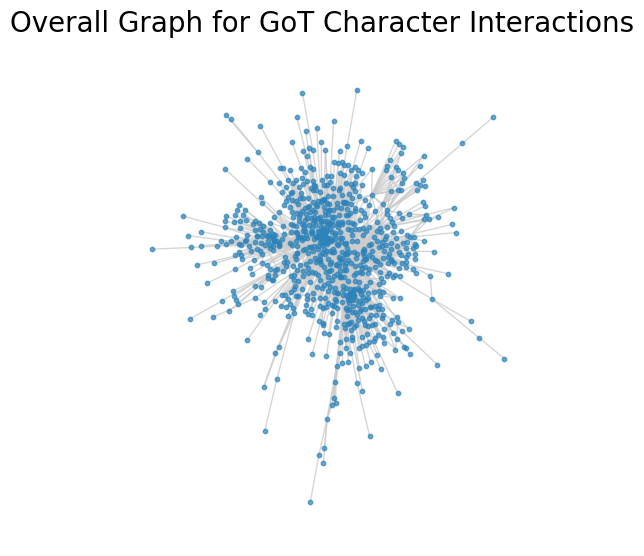

In [8]:
# plot the figure and save it as an image
plt.figure(figsize=(5,6), dpi=100, frameon=False)
plt.suptitle('Overall Graph for GoT Character Interactions', fontsize=20)
plt.autoscale(enable=True, axis='both', tight=True)
plt.axis('off')
# create the network layout
spring_pos = nx.fruchterman_reingold_layout(G, scale=1, center=(0,0),iterations=100)

#nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size =15, node_color='b', edge_alpha=0.5)
nx.draw_networkx_edges(G, pos = spring_pos, with_labels = False, alpha=0.8, edge_color="#CCCCCC")
nx.draw_networkx_nodes(G, pos = spring_pos, with_labels = False, node_size=10, alpha=0.7, node_color=Spectral4[0])

plt.show()

In [9]:
print("Graph Summary:")
print(" ")
print(nx.info(G))

Graph Summary:
 
Name: Game of Thrones Character Interactions
Type: Graph
Number of nodes: 796
Number of edges: 2823
Average degree:   7.0930
